In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# Load your dataset (assuming it's stored in a variable named 'dataset')
dataset = pd.read_csv('crime.csv')
# Extract features (X) and target variable (y)
X = dataset.drop(['risk', 'district', 'total_ipc_crimes', 'other_ipc_crimes'], axis=1)  # Exclude the target variable
y = dataset['risk']

In [11]:
# Encode categorical variables
label_encoder = LabelEncoder()
X['state_ut'] = label_encoder.fit_transform(X['state_ut'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

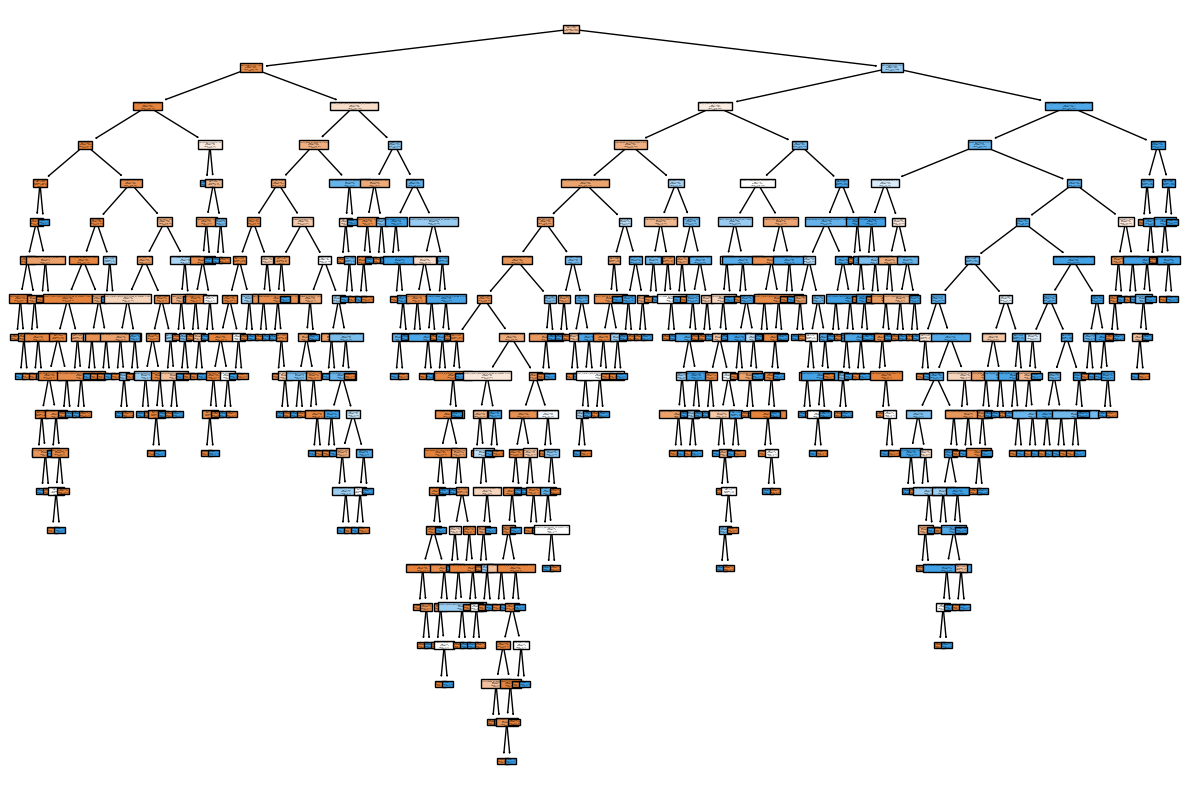

In [25]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=y.name)
plt.show()

In [15]:
# Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = dt_model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9191860465116279


In [16]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print('\nFeature Importance:')
print(feature_importance)


Feature Importance:
                                              Feature  Importance
15                                              theft    0.447258
23                                 hurt_grevious_hurt    0.157894
27                cruelty_by_husband_or_his_relatives    0.065575
25  assault_on_women_with_intent_to_outrage_her_mo...    0.044348
29                        causing_death_by_negligence    0.033620
20                                           cheating    0.019653
0                                            state_ut    0.019591
10                 kidnapping_and_abduction_of_others    0.019340
17                                        other_theft    0.018647
16                                         auto_theft    0.016929
18                                              riots    0.016544
19                           criminal_breach_of_trust    0.015126
11                                            dacoity    0.012838
3                                   attempt_to_murder  